# Creating a column to calculate the duration time of the fires

# - To do so we start by importing the necessary libraries
# - You will then import the dataset 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [4]:
complete_df =pd.read_csv("Cleaned Data/california_wildfire_data_cleaned.csv")

In [5]:
len(complete_df)

2779

In [6]:
complete_df.columns

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID'],
      dtype='object')

In [7]:
complete_df.dtypes

Unnamed: 0                 int64
Incident Name             object
County                    object
Administrative Unit       object
Acres Burned             float64
Crews Involved           float64
Dozers                   float64
Engines                  float64
Fatalities               float64
Helicopters              float64
Injuries                 float64
Personnel Involved       float64
Structures Damaged       float64
Structures Destroyed     float64
Structures Threatened    float64
Water Tenders            float64
Fire Started              object
Fire Extinguished         object
Longitude                float64
Latitude                 float64
Incident ID               object
dtype: object

##### After finding that the data in the column fire started and extinguished were listed as objects;
##### convert the two columns to datetime format to get numerical values
##### Subtract the Fire extinguished from Fire Started to get the Duration values

In [9]:
complete_df["Fire Started"] = pd.to_datetime(complete_df["Fire Started"], format ="ISO8601", utc= True)

In [10]:
complete_df["Fire Extinguished"]= pd.to_datetime(complete_df["Fire Extinguished"],format ="ISO8601", utc= True)

In [11]:
complete_df["Fire Duration"]= complete_df["Fire Extinguished"] - complete_df["Fire Started"]

In [12]:
complete_df.head(5)

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID,Fire Duration
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,0.0,0.0,0.0,25.0,2013-02-24 08:16:00+00:00,2013-02-28 20:00:00+00:00,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23,4 days 11:44:00
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-04-20 17:30:00+00:00,2013-04-22 09:00:00+00:00,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f,1 days 15:30:00
2,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-04-30 12:59:00+00:00,2013-05-01 07:00:00+00:00,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb,0 days 18:01:00
3,3,Silverado Fire,Napa,CAL FIRE Sonoma-Lake-Napa Unit,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-04-30 23:44:00+00:00,2013-05-01 17:15:00+00:00,-122.350844,38.441792,d8d1c943-7b5d-4885-9043-f41075d6eded,0 days 17:31:00
4,4,Yellow Fire,Sonoma,CAL FIRE Sonoma-Lake-Napa Unit,125.0,9.0,5.0,17.0,0.0,5.0,...,0.0,0.0,0.0,5.0,2013-05-01 02:01:00+00:00,2013-05-03 06:15:00+00:00,-122.655616,38.638828,64e4f81e-d872-44c4-ba8d-111fa77124ba,2 days 04:14:00


##### The minimum fire days is negative which shows some information is inacurate.
##### By sorting out the incomplete information, it allows us to get a logical understanding of our data

In [14]:
complete_df["Fire Duration"].describe()

count                          2779
mean     48 days 20:33:30.756747031
std      78 days 03:21:40.220519839
min             -195 days +14:53:07
25%                 1 days 22:44:08
50%                 3 days 08:57:09
75%                84 days 12:34:00
max               391 days 19:16:34
Name: Fire Duration, dtype: object

In [15]:
errortime = complete_df[complete_df["Fire Duration"] <'0 days +00:00:00']

In [16]:
errortime.head()

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID,Fire Duration
48,48,Mount Fire,Lake,CAL FIRE Sanoma-Lake-Napa Unit,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-06-20 14:29:00+00:00,2013-06-20 13:15:00+00:00,-122.817960,38.980580,d489b45e-dcba-4eaa-8bb5-6a23255562da,-1 days +22:46:00
108,108,Empire Fire,El Dorado,CAL FIRE Amador-El Dorado Unit,38.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-08-24 14:54:00+00:00,2013-08-24 11:45:00+00:00,-120.847160,38.895550,fea7802f-ba70-450a-9ad1-96e2751293a9,-1 days +20:51:00
114,114,Rail Fire,Modoc,Modoc National Forest,68.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-09-07 17:30:00+00:00,2013-09-05 21:00:00+00:00,-120.959000,41.569000,0875cf4e-9948-45ed-a76d-d74564319b49,-2 days +03:30:00
120,120,Lakeshore Fire,Lake,CAL FIRE Sonoma-Lake-Napa Unit,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-09-15 19:45:00+00:00,2013-09-15 17:14:00+00:00,-122.683000,38.977700,51e00abb-53d0-4014-9224-2a853b1d6bcf,-1 days +21:29:00
165,165,Hall Fire,Fresno,CAL FIRE Fresno-Kings Unit,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014-06-11 07:30:00+00:00,2014-06-09 19:15:00+00:00,-119.241493,36.742747,ccc2ec2b-4941-4bbd-ae60-be6706d97f13,-2 days +11:45:00


In [17]:
complete_df = complete_df.drop(errortime.index)

In [18]:
complete_df['Fire Duration'].describe()

count                          2713
mean     50 days 02:58:33.894213047
std      78 days 13:39:39.562406181
min                 0 days 00:00:00
25%                 2 days 03:14:20
50%                 3 days 08:57:09
75%                89 days 21:37:00
max               391 days 19:16:34
Name: Fire Duration, dtype: object

##### The avg fire last 50 days 02:58:33
##### The Maximum duration of a fire is 391 days 19:16:34

<Axes: xlabel='Fire Duration'>

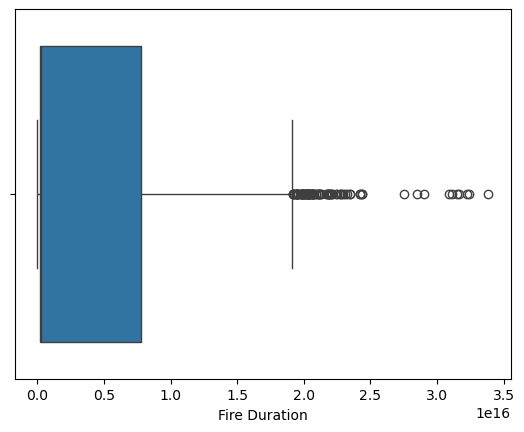

In [20]:
sns.boxplot(x=complete_df['Fire Duration'])

In [21]:
complete_df['Fire Duration Days']= complete_df['Fire Duration'].dt.days

In [22]:
complete_df['Acres Burned Log'] = np.log1p(complete_df['Acres Burned'])

In [24]:
from scipy.stats import linregress

def linear_regression_plot(x,y):

    slope, intercept, r, p, std_err = linregress(x,y)

    y_axis = list(map((lambda x_valus: slope * x_valus + intercept), x))
 
    plt.plot(x, y_axis, color= 'blue')
 
    equation = f"y={slope:.2f}x + {intercept:.2f}"

    plt.text(min(x),min(y), equation, fontsize= 15, color='blue', verticalalignment='top')
 
    print(f'The r^2 value is: {np.square(r)}')

The r^2 value is: 0.14022282587532023


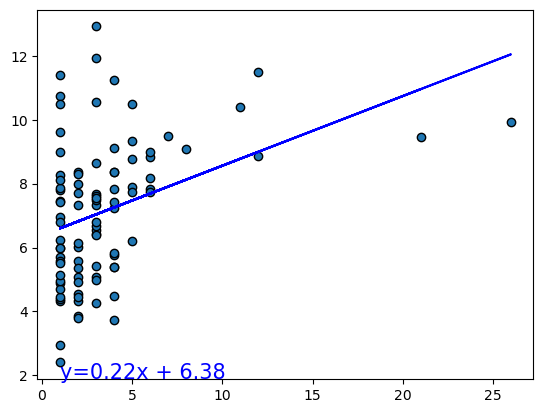

In [180]:
sample1= complete_df[complete_df['Injuries'] != 0]
x=sample1['Injuries']

y=sample1['Acres Burned Log'] 
 
linear_regression_plot(x,y) 

plt.scatter(x,y, marker='o', edgecolors='black')

The r^2 value is: 0.04979701177694232


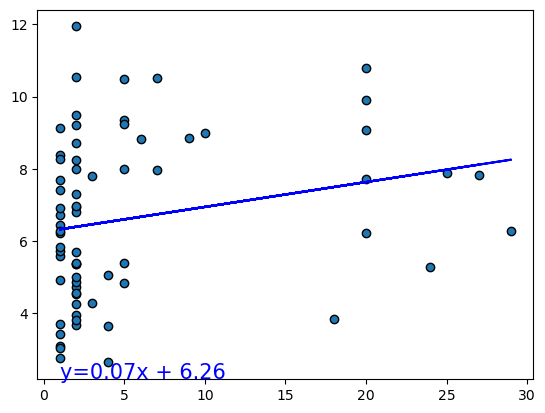

In [182]:
sample2= complete_df[complete_df['Helicopters'] != 0]
x=sample2['Helicopters']

y=sample2['Acres Burned Log'] 
 
linear_regression_plot(x,y) 

plt.scatter(x,y, marker='o', edgecolors='black')

The r^2 value is: 0.12383786041548382


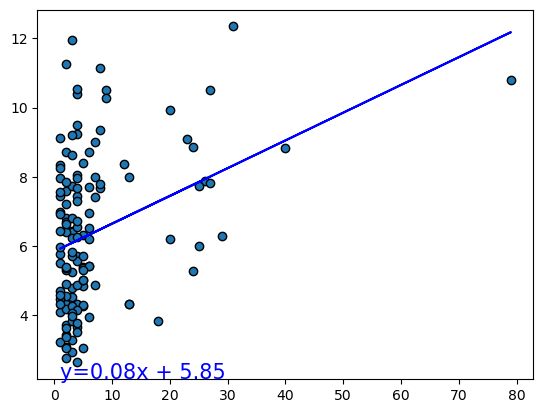

In [186]:
sample3= complete_df[complete_df['Water Tenders'] != 0]
x=sample3['Water Tenders']

y=sample3['Acres Burned Log'] 
 
linear_regression_plot(x,y) 

plt.scatter(x,y, marker='o', edgecolors='black')